In [158]:
!pip install xgboost
!pip install openpyxl


                                                    import needed                                   

In [514]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score  

                                                                READ DATA                                   

In [160]:
df=pd.read_excel("titanic2.csv")
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [161]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [163]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

                                                                visu            

<Axes: xlabel='Sex', ylabel='count'>

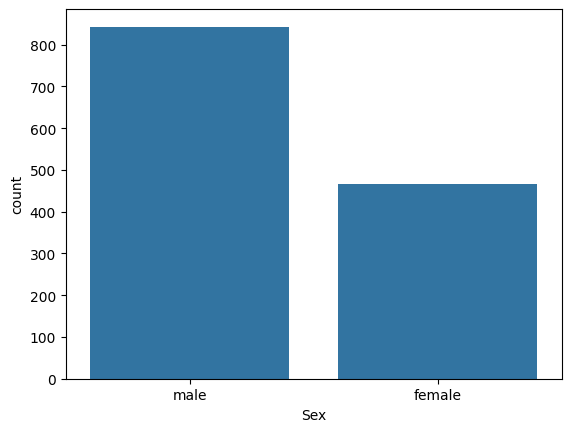

In [164]:
sns.countplot(x="Sex",data=df)

                                                        preprocessing                   


In [165]:
if "Cabin" in df.columns:
    df.drop(["Name","Ticket","Cabin"],axis="columns",inplace=True)
df.head(10)

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S
5            6         0       3    male   NaN      0      0   8.4583        Q
6            7         0       1    male  54.0      0      0  51.8625        S
7            8         0       3    male   2.0      3      1  21.0750        S
8            9         1       3  female  27.0      0      2  11.1333        S
9           10         1       2  female  14.0      1      0  30.0708        C

In [166]:
df.fillna({"Age":df['Age'].mean(),},inplace=True)
df.head(10)

PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.000000      1      0   7.2500   
1            2         1       1  female  38.000000      1      0  71.2833   
2            3         1       3  female  26.000000      0      0   7.9250   
3            4         1       1  female  35.000000      1      0  53.1000   
4            5         0       3    male  35.000000      0      0   8.0500   
5            6         0       3    male  29.881138      0      0   8.4583   
6            7         0       1    male  54.000000      0      0  51.8625   
7            8         0       3    male   2.000000      3      1  21.0750   
8            9         1       3  female  27.000000      0      2  11.1333   
9           10         1       2  female  14.000000      1      0  30.0708   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  
5        Q  
6        S  
7        S  
8        S  
9        C

In [167]:
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [168]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [169]:
df['Sex'].unique()


array(['male', 'female'], dtype=object)

In [170]:
if "male" in df['Sex'].unique():    
    df['Sex']=df['Sex'].map({"male":1,"female":0})
if "C" in df['Embarked'].unique():
    df['Embarked']=df['Embarked'].map({"C":0,"S":1,"Q":2})
df.head()


PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         1
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         1
3            4         1       1    0  35.0      1      0  53.1000         1
4            5         0       3    1  35.0      0      0   8.0500         1

                                             build model by xgboost                     

Text(0.5, 1.0, 'corr matrix of titanic data')

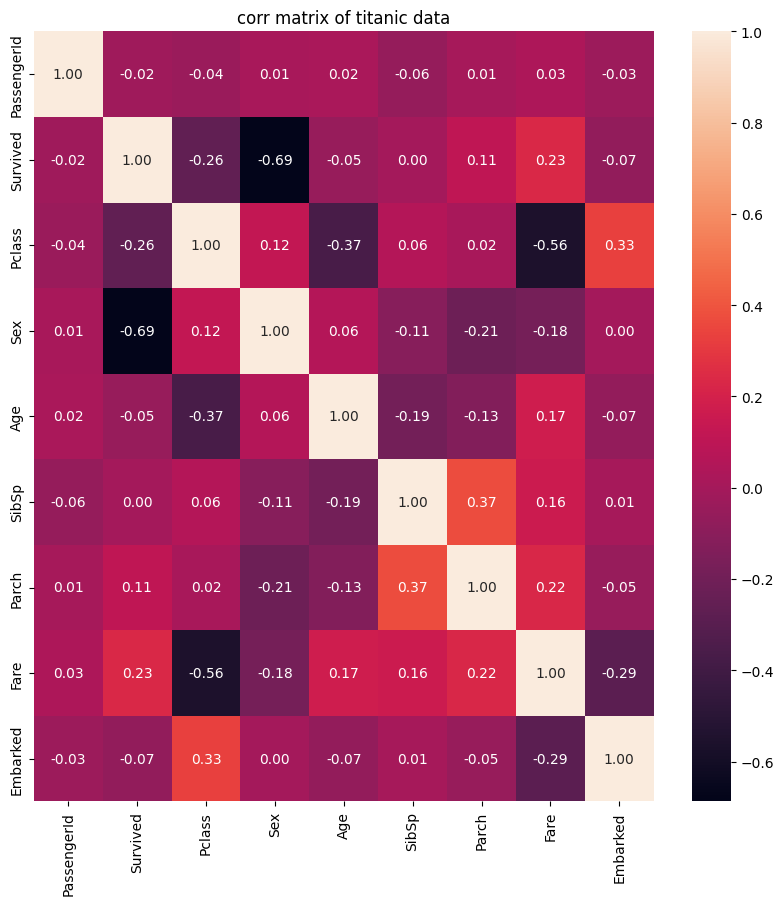

In [191]:
corr_m=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_m,annot=True,fmt="0.2f")
plt.title("corr matrix of titanic data")

In [206]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [216]:
# threshold=0.
# feature=corr_m.index[abs(corr_m['Survived'])>threshold].tolist() 
# feature.remove("Survived")

In [209]:
x=df.drop("Survived",axis="columns")
y=df['Survived']
x.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1       3    1  22.0      1      0   7.2500         1
1            2       1    0  38.0      1      0  71.2833         0
2            3       3    0  26.0      0      0   7.9250         1
3            4       1    0  35.0      1      0  53.1000         1
4            5       3    1  35.0      0      0   8.0500         1

In [638]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [639]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [640]:
model=XGBClassifier()
model.fit(x_train,y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [641]:
y_pre=model.predict(x_test)
acc=accuracy_score(y_test,y_pre)
acc

0.8625954198473282